In [1]:
!sudo apt-get install build-essential swig
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip3 install

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (1,100 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
de

In [2]:
!sudo apt-get install libgeos-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.10.2-1).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [3]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.10.2-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [4]:
!apt-get install -qq libproj-dev proj-data proj-bin
!apt-get install -qq libgeos-dev


Selecting previously unselected package proj-bin.
(Reading database ... 121652 files and directories currently installed.)
Preparing to unpack .../proj-bin_8.2.1-1_amd64.deb ...
Unpacking proj-bin (8.2.1-1) ...
Setting up proj-bin (8.2.1-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [5]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.1 MB/s eta 0:00:00


In [6]:

!pip install auto-sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 44.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [7]:
from __future__ import print_function

import pandas as pd
import numpy as np

from collections import Counter
import time
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import sys
import os
import math
import datetime

In [8]:

!pip install https://github.com/matplotlib/basemap/archive/master.zip

     | 129.7 MB 18.2 MB/s 0:00:13
ERROR: https://github.com/matplotlib/basemap/archive/master.zip does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [9]:
df = pd.read_csv('earthquake.csv')
df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [10]:
df.isna().sum()


id               0
date             0
time             0
lat              0
long             0
country          0
city         12253
area         11030
direction    13945
dist         13945
depth            0
xm               0
md               0
richter          0
mw           19004
ms               0
mb               0
dtype: int64

<ipython-input-11-c46216bfb074>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True,


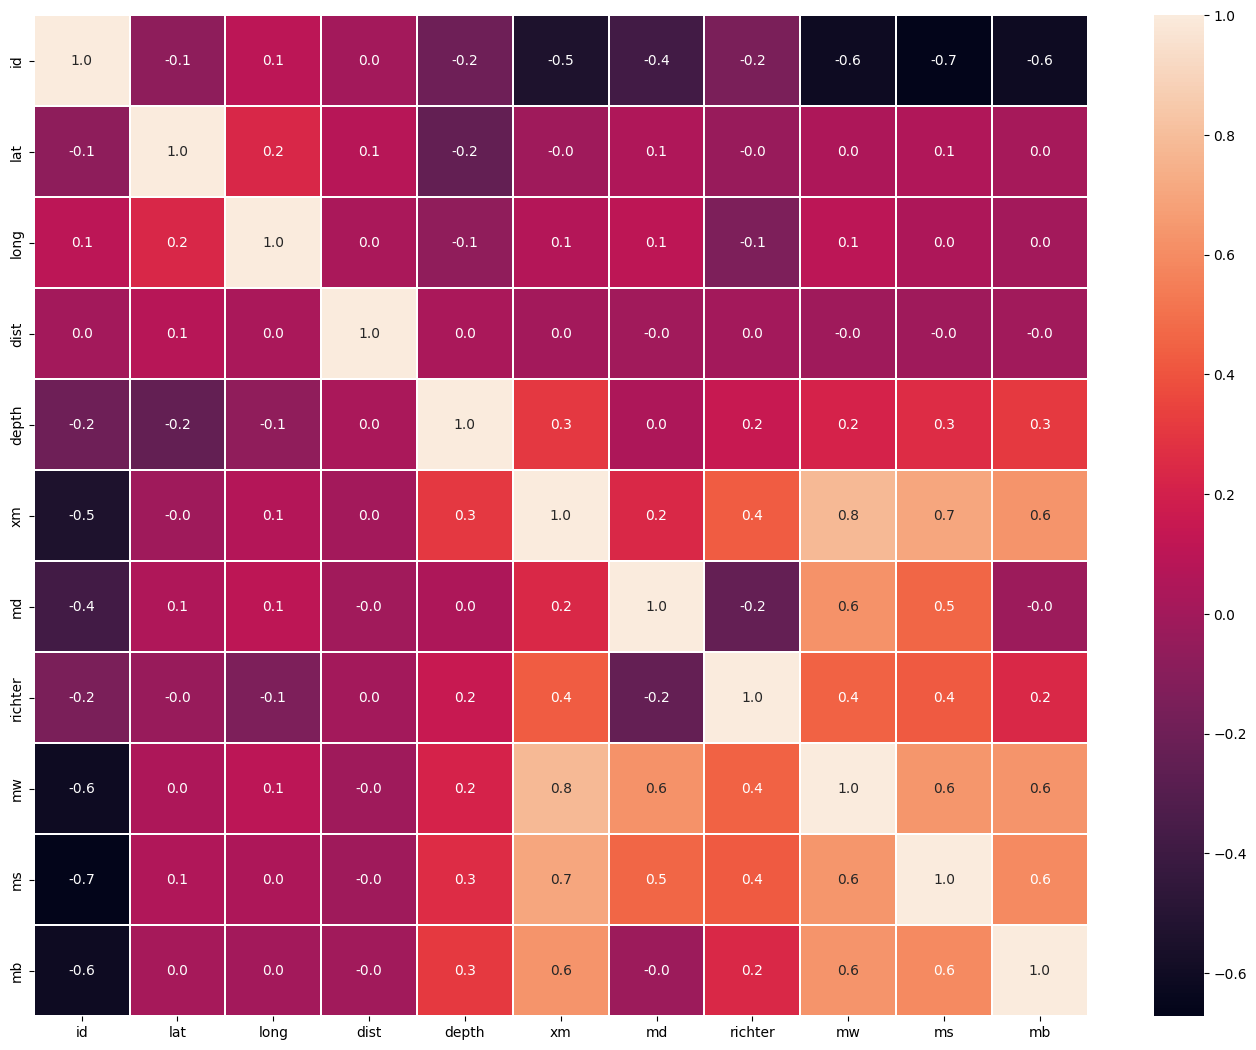

In [11]:
x, ax= plt.subplots(figsize= (17,13))
sns.heatmap(df.corr(), annot= True,
            linewidths= .2, fmt= ".1f", ax=ax)
plt.show()

In [12]:
pd.options.mode.chained_assignment = None
for i in range(len(df)):
        if math.isnan(df["mw"].iloc[i]):
            df["mw"].iloc[i] = df["xm"].iloc[i]

df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,4.1,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,4.0,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,3.7,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,3.5,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,4.3,0.0,0.0


In [13]:
def yeardate(df):
    return df[0:4]
def monthdate(df):
    return df[5:7]
def daydate(df):
    return df[8:10]

df["yeardate"] = df.date.apply(yeardate)
df['yeardate'] = df.yeardate.astype(int)

df["monthdate"] = df.date.apply(monthdate)
df['monthdate'] = df.monthdate.astype(int)

df["daydate"] = df.date.apply(daydate)
df['daydate'] = df.daydate.astype(int)

#Datetime version: 2021-01-21 22:30:31.943988

df["period"] = df["yeardate"].astype(str) + "-" +df["monthdate"].astype(str) + "-" +df["daydate"].astype(str) + " " + df["time"]
df.period = pd.to_datetime(df.period)
df.head()

,id,date,time,lat,long,country,city,area,direction,dist,...,xm,md,richter,mw,ms,mb,yeardate,monthdate,daydate,period
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,...,4.1,4.1,0.0,4.1,0.0,0.0,2003,5,20,2003-05-20 00:17:44
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,...,4.0,3.8,4.0,4.0,0.0,0.0,2007,8,1,2007-08-01 00:03:08
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,...,3.7,0.0,0.0,3.7,0.0,3.7,1978,5,7,1978-05-07 00:41:37
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,...,3.5,3.5,0.0,3.5,0.0,0.0,1997,3,22,1997-03-22 00:31:45
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,...,4.3,4.3,0.0,4.3,0.0,0.0,2000,4,2,2000-04-02 00:57:38


In [14]:
df.drop(['date','country', 'area', 'direction', 'dist','time'], axis=1, inplace=True)

In [15]:
df.head()

,id,lat,long,city,depth,xm,md,richter,mw,ms,mb,yeardate,monthdate,daydate,period
0,2.000000e+13,39.04,40.38,bingol,10.0,4.1,4.1,0.0,4.1,0.0,0.0,2003,5,20,2003-05-20 00:17:44
1,2.010000e+13,40.79,30.09,kocaeli,5.2,4.0,3.8,4.0,4.0,0.0,0.0,2007,8,1,2007-08-01 00:03:08
2,1.980000e+13,38.58,27.61,manisa,0.0,3.7,0.0,0.0,3.7,0.0,3.7,1978,5,7,1978-05-07 00:41:37
3,2.000000e+13,39.47,36.44,sivas,10.0,3.5,3.5,0.0,3.5,0.0,0.0,1997,3,22,1997-03-22 00:31:45
4,2.000000e+13,40.80,30.24,sakarya,7.0,4.3,4.3,0.0,4.3,0.0,0.0,2000,4,2,2000-04-02 00:57:38


In [16]:
df.corr()


<ipython-input-16-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,lat,long,depth,xm,md,richter,mw,ms,mb,yeardate,monthdate,daydate
id,1.000000,-0.071851,0.104695,-0.201035,-0.535262,-0.379838,-0.152355,-0.524702,-0.672286,-0.611488,0.990309,0.028854,0.012129
lat,-0.071851,1.000000,0.232346,-0.241904,-0.010347,0.051100,-0.032155,-0.010366,0.056228,0.015019,-0.064922,0.004853,0.000025
long,0.104695,0.232346,1.000000,-0.064886,0.071856,0.107302,-0.140393,0.078970,0.043574,0.003432,0.105383,0.045166,0.004983
depth,-0.201035,-0.241904,-0.064886,1.000000,0.302926,0.042542,0.150559,0.270426,0.260246,0.313953,-0.204122,-0.012269,-0.009948
xm,-0.535262,-0.010347,0.071856,0.302926,1.000000,0.241432,0.426653,0.879499,0.699579,0.628382,-0.542359,-0.000177,0.003945
md,-0.379838,0.051100,0.107302,0.042542,0.241432,1.000000,-0.237586,0.250319,0.461104,-0.022863,-0.385794,-0.007479,-0.029486
richter,-0.152355,-0.032155,-0.140393,0.150559,0.426653,-0.237586,1.000000,0.331258,0.419664,0.240694,-0.150514,-0.007377,0.031128
mw,-0.524702,-0.010366,0.078970,0.270426,0.879499,0.250319,0.331258,1.000000,0.622337,0.581108,-0.525330,-0.009097,0.001611
ms,-0.672286,0.056228,0.043574,0.260246,0.699579,0.461104,0.419664,0.622337,1.000000,0.588919,-0.675958,-0.016171,0.004676
mb,-0.611488,0.015019,0.003432,0.313953,0.628382,-0.022863,0.240694,0.581108,0.588919,1.000000,-0.616031,-0.010351,0.004209


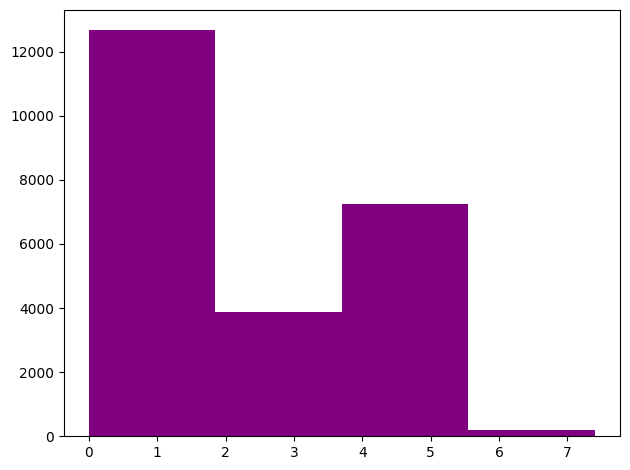

[0.   1.85 3.7  5.55 7.4 ]
[12662.  3886.  7258.   201.]


In [17]:
mag = df.md
(n, bins, patches) = plt.hist(mag, bins = 4, color = "purple")
plt.tight_layout()
plt.show()
print(bins)
print(n)

<ipython-input-18-438687aa4c78>:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


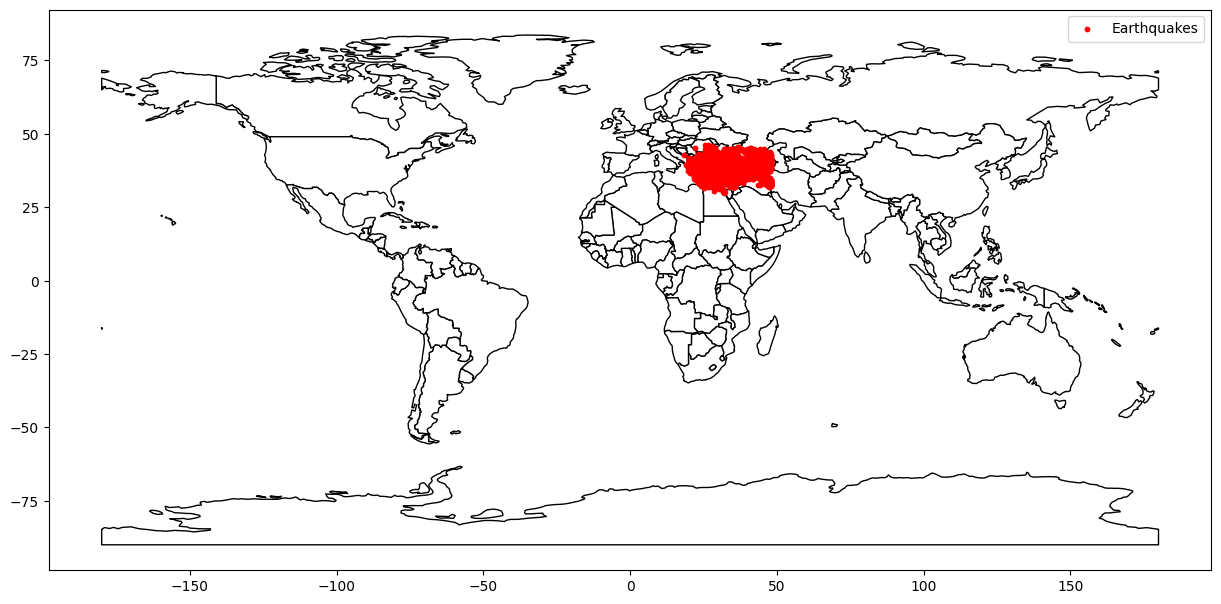

In [18]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# Veri setindeki enlem ve boylam bilgilerini kullanarak Point geometrisi oluşturma
df['geometry'] = df.apply(lambda x: Point((x['long'], x['lat'])), axis=1)

# GeoDataFrame oluşturma
geo_df = gpd.GeoDataFrame(df, geometry='geometry')

# Basit bir dünya haritası oluşturma ve depremlerin konumlarını görselleştirme
fig, ax = plt.subplots(figsize=(15, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='white', edgecolor='black')
geo_df.plot(ax=ax, markersize=10, color='red', marker='o', label='Earthquakes')
plt.legend()
plt.show()

In [19]:
!python --version

Python 3.10.12


/bin/bash: line 1: apt-get: command not found
/bin/bash: line 1: apt-get: command not found


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


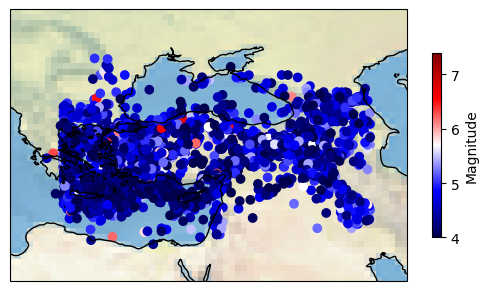

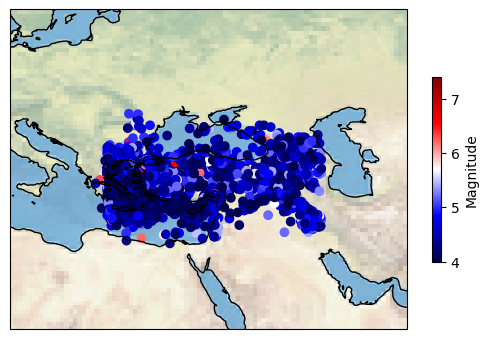

In [20]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd

def drawmap(df, zoom=1):
    # Haritanın boyutunu ayarla
    extent = [df.long.min() - zoom, df.long.max() + zoom, df.lat.min() - zoom, df.lat.max() + zoom]

    # Cartopy ile harita oluşturma
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    ax.set_extent(extent)

    # Verileri harita üzerine yerleştirme
    scatter = ax.scatter(df.long, df.lat, c=df.md, cmap='seismic', transform=ccrs.PlateCarree())

    # Renk skalası ekleme
    plt.colorbar(scatter, ax=ax, shrink=0.5, label='Magnitude')

    # Coğrafi özellikleri çizme
    ax.coastlines()
    ax.stock_img()

    plt.show()

over4 = df[df.md >= 4]
drawmap(over4, zoom=3)  # zoom değeri önceki örneğinize göre ayarlanmalıdır
drawmap(over4, zoom=10)

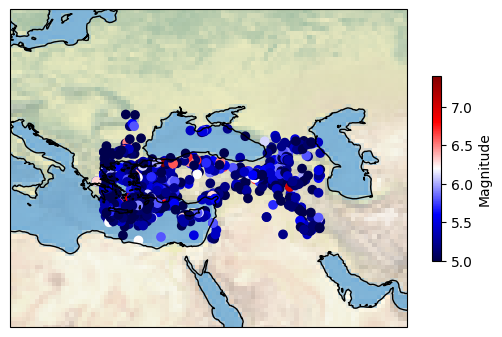

In [21]:
over5 = df[df.md >= 5]
drawmap(over5, zoom = 10)

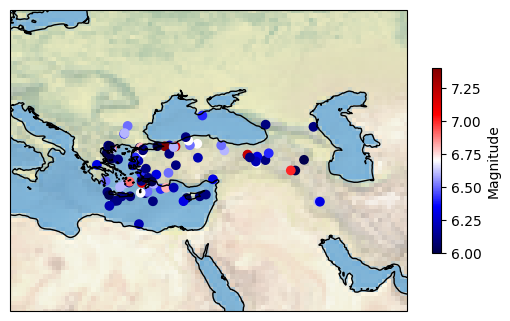

In [22]:
over6 = df[df.md >= 6]
drawmap(over6, zoom = 10)

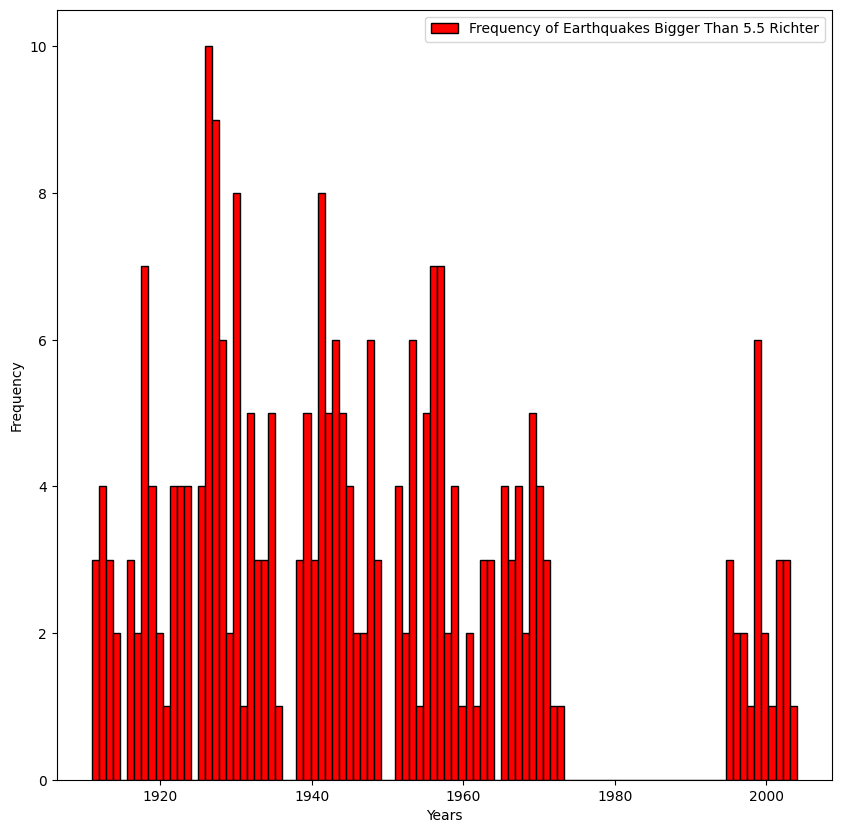

In [23]:
eq_big = df[(df.md >= 5.5)]
eq_big.yeardate.plot(kind = "hist" , color = "red" , edgecolor="black", bins = 100 , figsize = (10,10) , label = "Frequency of Earthquakes Bigger Than 5.5 Richter")
plt.legend(loc = "upper right")
plt.xlabel("Years")
plt.show()

In [24]:
eq_big['city'].unique()

array(['aydin', 'duzce', 'hatay', 'tokat', 'mus', 'burdur', 'bingol',
       'usak', 'denizli', 'osmaniye', 'sakarya', 'erzincan', 'giresun',
       'samsun', 'kastamonu', 'manisa', 'yozgat', 'kutahya', 'cankiri',
       'mugla', 'sivas', 'amasya', 'bursa', 'ardahan', 'adana',
       'eskisehir', 'balikesir', 'izmir', 'adiyaman', 'diyarbakir',
       'kirikkale', 'erzurum', 'karabuk', 'tekirdag', 'kocaeli',
       'canakkale', 'konya', 'kirsehir', 'corum', 'kars', 'agri',
       'afyonkarahisar', 'antalya', 'tunceli', 'bartin', 'istanbul',
       'hakkari', nan, 'gazimagusa'], dtype=object)

In [25]:
df['city'].unique()

array(['bingol', 'kocaeli', 'manisa', 'sivas', 'sakarya', 'mugla', 'van',
       'balikesir', 'kirikkale', 'kahramanmaras', 'adiyaman', 'duzce',
       'antalya', 'kutahya', 'burdur', 'erzincan', 'hatay', 'mus',
       'denizli', 'canakkale', 'bolu', 'tokat', 'sanliurfa', 'corum',
       'izmir', 'gumushane', 'amasya', 'batman', 'cankiri', 'osmaniye',
       'elazig', 'bursa', 'erzurum', 'aydin', 'zonguldak', 'karabuk',
       'samsun', 'malatya', 'tekirdag', 'igdir', 'hakkari', 'ankara',
       'sirnak', 'diyarbakir', 'kirsehir', 'afyonkarahisar', 'kastamonu',
       'bartin', 'konya', 'isparta', 'kars', 'agri', 'bitlis', 'tunceli',
       'istanbul', 'yalova', 'yozgat', 'adana', 'usak', 'edirne',
       'kirklareli', 'mersin', 'bilecik', 'eskisehir', 'gaziantep',
       'bayburt', 'nigde', 'kayseri', 'giresun', 'mardin', 'artvin',
       'aksaray', 'ardahan', 'sinop', 'siirt', 'ordu', 'trabzon', 'kilis',
       'karaman', 'nevsehir', 'rize', nan, 'marmara_denizi', 'lefkosa',
       '

In [26]:
X = df[['yeardate', 'lat', 'long']]
y = df[["md","depth"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(19205, 3) (4802, 3) (19205, 2) (4802, 3)


In [27]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)
reg.predict(X_test)

reg.score(X_test, y_test)

0.5705154158056536

In [28]:
for i in range(len(df)):
        if df["md"].iloc[i] == 0:
            df["md"].iloc[i] = 0.01

In [29]:
print(df[["md"]])

         md
0      4.10
1      3.80
2      0.01
3      3.50
4      4.30
...     ...
24002  0.01
24003  0.01
24004  0.01
24005  0.01
24006  0.01

[24007 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X = df[['yeardate', 'lat', 'long']]
y = df[["md"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(19205, 3) (4802, 3) (19205, 1) (4802, 3)


In [ ]:
import sklearn.datasets
import sklearn.metrics

import autosklearn.regression

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)
automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        tmp_folder='/tmp/autosklearn_md_tmp',
        output_folder='/tmp/autosklearn_md_out',)

automl.fit(X_train, y_train, dataset_name='earthquake')
print(automl.show_models())
predictions = automl.predict(X_test)

print("R2 score:", sklearn.metrics.r2_score(y_test, predictions))

[(0.560000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'most_frequent', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'minmax', 'feature_preprocessor:__choice__': 'polynomial', 'regressor:__choice__': 'extra_trees', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.013018052591541176, 'feature_preprocessor:polynomial:degree': 2, 'feature_preprocessor:polynomial:include_bias': 'False', 'feature_preprocessor:polynomial:interaction_only': 'False', 'regressor:extra_trees:bootstrap': 'False', 'regressor:extra_trees:criterion': 'friedman_mse', 'regressor:extra_trees:max_depth': 'None', 'regressor:extra_trees:max_features': 0.9734334465992716, 'regressor:extra_trees:max_leaf_nodes': '

In [ ]:
predictions

array([0.01397876, 0.01084254, 4.74413324, ..., 3.83604361, 0.40401361,
       4.81130093])

In [ ]:
preds = pd.DataFrame(predictions, columns = ["prediction"])
print(preds)

      prediction
0       0.013979
1       0.010843
2       4.744133
3       4.247197
4       1.049433
...          ...
5997    0.011415
5998    2.829980
5999    3.836044
6000    0.404014
6001    4.811301

[6002 rows x 1 columns]


In [ ]:
indexed = a.set_index('new_keys')
print(indexed)

            md
new_keys      
0         0.01
1         0.01
2         4.80
3         4.00
4         0.01
...        ...
5997      0.01
5998      0.01
5999      3.80
6000      0.01
6001      5.80

[6002 rows x 1 columns]


In [ ]:
preds["actual"] = indexed["md"]

In [ ]:
print(preds)

      prediction  actual
0       0.013979    0.01
1       0.010843    0.01
2       4.744133    4.80
3       4.247197    4.00
4       1.049433    0.01
...          ...     ...
5997    0.011415    0.01
5998    2.829980    0.01
5999    3.836044    3.80
6000    0.404014    0.01
6001    4.811301    5.80

[6002 rows x 2 columns]


In [ ]:
#OK, let's do a manual accuracy score, because we can do it.
#Also, I wanted to do manually, just to study

#absolute difference to show
preds["difference"] =abs(preds['prediction'].sub(preds['actual'], axis = 0))

preds

,prediction,actual,difference
0,0.013979,0.01,0.003979
1,0.010843,0.01,0.000843
2,4.744133,4.80,0.055867
3,4.247197,4.00,0.247197
4,1.049433,0.01,1.039433
...,...,...,...
5997,0.011415,0.01,0.001415
5998,2.829980,0.01,2.819980
5999,3.836044,3.80,0.036044
6000,0.404014,0.01,0.394014


In [ ]:
#Actual mean squared error
mse = (preds["difference"]**2).mean(axis = 0)
print(mse)

0.7081254825365683


In [ ]:
math.sqrt(mse)

0.8415019206968979